<a href="https://colab.research.google.com/github/quruis/2460_Presentation/blob/main/SSerrattan_ECO2460_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vaderSentiment
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords, words
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('words')
nltk.download('stopwords')
import re

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<ipython-input-2-4bd32a94cd05>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(url, error_bad_lines=False)


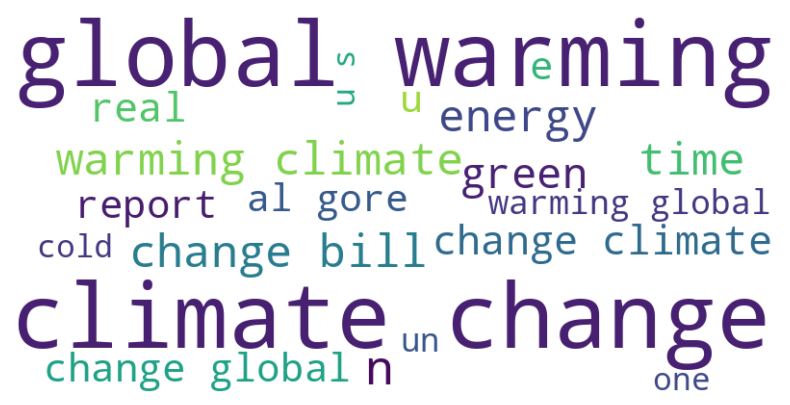

In [2]:
# Load CSV file into a DataFrame
# https://data.world/crowdflower/sentiment-of-climate-change/activity
url = 'https://github.com/quruis/2460_Presentation/raw/main/Tweets_CC.csv'
df = pd.read_csv(url, error_bad_lines=False)

df = df.drop_duplicates()

# Assuming your CSV has a column named 'tweet' containing the textual data
text_data = ' '.join(df['tweet'].astype(str).values)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_text = ' '.join(word for word in text_data.split() if word.lower() not in stop_words)

# List of terms to exclude
exclude_terms = ['TIME', 'oohja', 'say', 'change climate',  'ow', 's climate', 's', 'new', 'ly', 'bit', 'bit ly', 'U S', 'tcot', 'ow ly', 'retwt', 'science', 'u', 'u s ', 'New', 'link', 'RT', 'Change link', 'tinyurl', 'via']

# Remove excluded terms from the text data
for term in exclude_terms:
    filtered_text = filtered_text.replace(term, '')

# Get a list of English words
english_words = set(words.words())

# Function to filter nonsense words
def filter_nonsense(text):
    words = re.findall(r'\b\w+\b', text.lower())
    filtered_words = [word for word in words if word in english_words]
    return ' '.join(filtered_words)

# Filter nonsense words from the text data
filtered_text = filter_nonsense(filtered_text)

# Create WordCloud object without using frequencies
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    contour_width=1,
    contour_color='black',
    max_words=20,
    random_state=42
).generate(filtered_text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
# https://data.world/crowdflower/sentiment-of-climate-change/activity

# Load your labeled training dataset
train_df = pd.read_csv('https://raw.githubusercontent.com/quruis/2460_Presentation/main/Train_Tweets_CC.csv')  # Replace 'train_data.csv' with your actual training data file name
train_text_column = 'tweet'  # Replace 'text' with the actual column name for text data in the training set
train_label_column = 'sentiment'  # Replace 'sentiment' with the actual column name for sentiment labels in the training set

# Load your unlabeled test dataset
unlabeled_test_df = pd.read_csv('https://raw.githubusercontent.com/quruis/2460_Presentation/main/Tweets_CC.csv')  # Replace 'unlabeled_test_data.csv' with your actual unlabeled test data file name
unlabeled_test_df = unlabeled_test_df.drop_duplicates()
unlabeled_test_text_column = 'tweet'  # Replace 'text' with the actual column name for text data in the unlabeled test set




In [20]:
# Rule-based approach using VADER on training data
sid = SentimentIntensityAnalyzer()
vader_train_predictions = train_df[train_text_column].apply(lambda x: 'Positive' if sid.polarity_scores(x)['compound'] >= 0 else 'Negative')

# Full classification approach using logistic regression on training data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df[train_text_column])
logistic_model = LogisticRegression()
logistic_model.fit(X_train, train_df[train_label_column])


LogisticRegression()

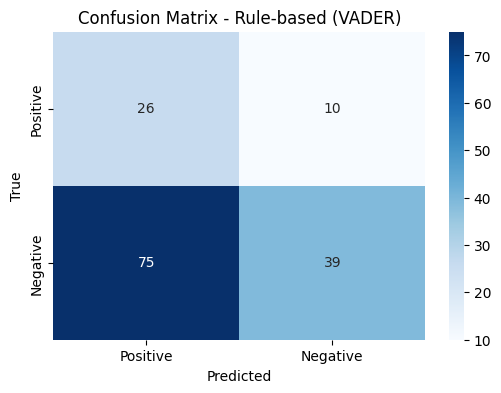

In [21]:
# Create confusion matrix for the rule-based (VADER) approach
conf_matrix_vader = confusion_matrix(train_df[train_label_column], vader_train_predictions, labels=['Positive', 'Negative'])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_vader, annot=True, fmt="d", cmap="Blues", xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix - Rule-based (VADER)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
#Rule-based approach using VADER on unlabeled test data
vader_unlabeled_predictions = unlabeled_test_df[unlabeled_test_text_column].apply(lambda x: 'Positive' if sid.polarity_scores(x)['compound'] >= 0 else 'Negative')

# Full classification approach using logistic regression on unlabeled test data
X_unlabeled_test = vectorizer.transform(unlabeled_test_df[unlabeled_test_text_column])
logistic_unlabeled_predictions = logistic_model.predict(X_unlabeled_test)

# Print the results
print("Training Data - Rule-based (VADER) Accuracy:", accuracy_score(train_df[train_label_column], vader_train_predictions))

# Note: Logistic regression accuracy on training data was not previously calculated in the code, so it's not included in this print statement.

print("\nUnlabeled Test Data - Rule-based (VADER) Predictions:")
for sentence, prediction in zip(unlabeled_test_df[unlabeled_test_text_column][:10], vader_unlabeled_predictions[:10]):
    print(f"Sentence: {sentence} - Prediction: {prediction}")

print("\nUnlabeled Test Data - Full Classification (Logistic Regression) Predictions:")
for sentence, prediction in zip(unlabeled_test_df[unlabeled_test_text_column][:10], logistic_unlabeled_predictions[:10]):
    print(f"Sentence: {sentence} - Prediction: {prediction}")

Training Data - Rule-based (VADER) Accuracy: 0.325

Unlabeled Test Data - Rule-based (VADER) Predictions:
Sentence: Global warming report urges governments to act|BRUSSELS, Belgium (AP) - The world faces increased hunger and .. [link] - Prediction: Positive
Sentence: Fighting poverty and global warming in Africa [link] - Prediction: Negative
Sentence: Carbon offsets: How a Vatican forest failed to reduce global warming [link] - Prediction: Negative
Sentence: URUGUAY: Tools Needed for Those Most Vulnerable to Climate Change [link] - Prediction: Negative
Sentence: RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness Shows Global Warming Is Intensifying Our Water Cycle [link] - Prediction: Positive
Sentence: Global warming evidence all around us|A message to global warming deniers and doubters: Just look around our .. [link] - Prediction: Negative
Sentence: Migratory Birds' New Climate Change Strategy: Stay Home [link] - Prediction: Positive
Sentence: Southern Africa: Competing for Limpopo Wate

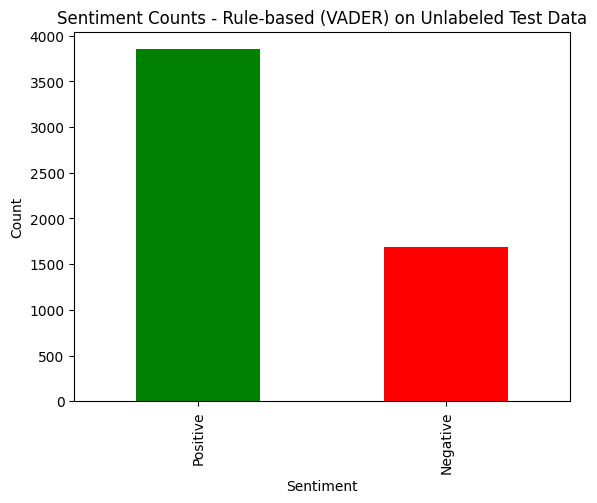

In [23]:
# Rule-based approach using VADER on unlabeled test data
vader_unlabeled_predictions = unlabeled_test_df[unlabeled_test_text_column].apply(lambda x: 'Positive' if sid.polarity_scores(x)['compound'] >= 0 else 'Negative' if sid.polarity_scores(x)['compound'] < 0 else 'Neutral')

# Get the count of each sentiment category
sentiment_counts = vader_unlabeled_predictions.value_counts()

# Plot the sentiment counts
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Sentiment Counts - Rule-based (VADER) on Unlabeled Test Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

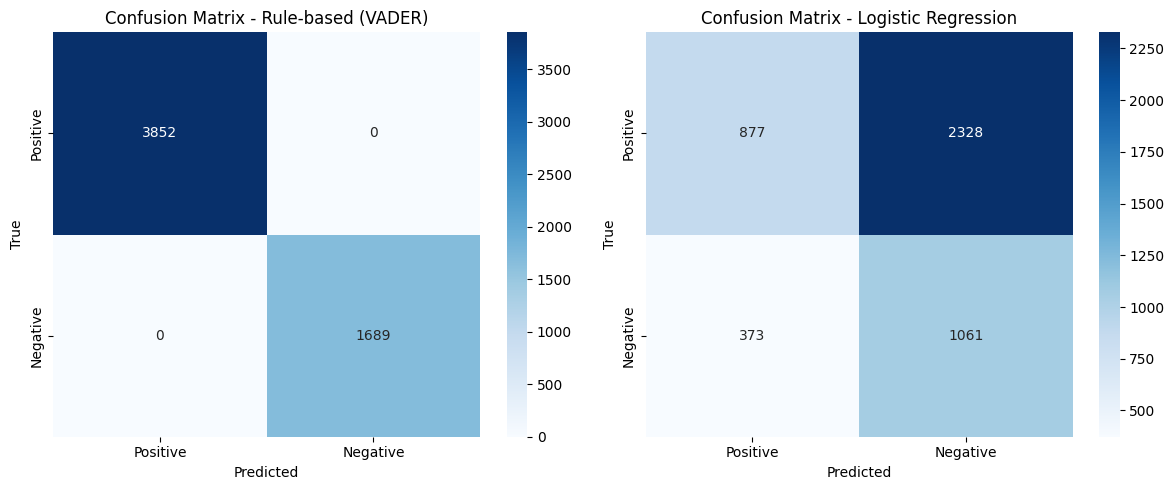

In [24]:
# Rule-based approach using VADER on training data
sid = SentimentIntensityAnalyzer()
vader_train_predictions = train_df[train_text_column].apply(lambda x: 'Positive' if sid.polarity_scores(x)['compound'] >= 0 else 'Negative')

# Full classification approach using logistic regression on training data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df[train_text_column])
logistic_model = LogisticRegression()
logistic_model.fit(X_train, train_df[train_label_column])

# Rule-based approach using VADER on unlabeled test data
vader_unlabeled_predictions = unlabeled_test_df[unlabeled_test_text_column].apply(lambda x: 'Positive' if sid.polarity_scores(x)['compound'] >= 0 else 'Negative')

# Full classification approach using logistic regression on unlabeled test data
X_unlabeled_test = vectorizer.transform(unlabeled_test_df[unlabeled_test_text_column])
logistic_unlabeled_predictions = logistic_model.predict(X_unlabeled_test)

# Create confusion matrices for both approaches
conf_matrix_vader = confusion_matrix(vader_unlabeled_predictions, vader_unlabeled_predictions, labels=['Positive', 'Negative'])
conf_matrix_logistic = confusion_matrix(vader_unlabeled_predictions, logistic_unlabeled_predictions, labels=['Positive', 'Negative'])

# Plot the confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_vader, annot=True, fmt="d", cmap="Blues", xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix - Rule-based (VADER)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

First 10 Predictions - Logistic Regression:
Sentence: Global warming report urges governments to act|BRUSSELS, Belgium (AP) - The world faces increased hunger and .. [link] - Prediction: Negative
Sentence: Fighting poverty and global warming in Africa [link] - Prediction: Neutral
Sentence: Carbon offsets: How a Vatican forest failed to reduce global warming [link] - Prediction: Negative
Sentence: URUGUAY: Tools Needed for Those Most Vulnerable to Climate Change [link] - Prediction: Negative
Sentence: RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness Shows Global Warming Is Intensifying Our Water Cycle [link] - Prediction: Negative
Sentence: Global warming evidence all around us|A message to global warming deniers and doubters: Just look around our .. [link] - Prediction: Negative
Sentence: Migratory Birds' New Climate Change Strategy: Stay Home [link] - Prediction: Neutral
Sentence: Southern Africa: Competing for Limpopo Water: Climate change will bring higher temperatures to Southe... [l

<ipython-input-25-41749baea45b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=logistic_sentiment_counts.index, y=logistic_sentiment_counts.values, palette="Set2")


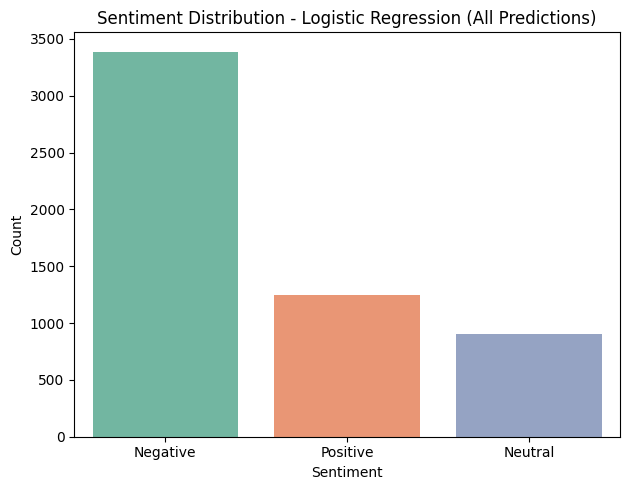

In [25]:
# Print the first ten instances and their predictions for logistic regression
print("First 10 Predictions - Logistic Regression:")
for sentence, prediction in zip(unlabeled_test_df[unlabeled_test_text_column][:10], logistic_unlabeled_predictions[:10]):
    print(f"Sentence: {sentence} - Prediction: {prediction}")

# Count the occurrences of positive and negative sentiment for all logistic regression predictions
logistic_sentiment_counts = pd.Series(logistic_unlabeled_predictions).value_counts()

# Plot the sentiment distribution for logistic regression predictions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
sns.barplot(x=logistic_sentiment_counts.index, y=logistic_sentiment_counts.values, palette="Set2")
plt.title('Sentiment Distribution - Logistic Regression (All Predictions)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()